<a href="https://colab.research.google.com/github/oncejhonceasar/projects/blob/main/Understanding%20Heart%20Disease%3A%20Insights%20from%20Health%20Metrics%20and%20Lifestyle%20Factors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
oktayrdeki_heart_disease_path = kagglehub.dataset_download('oktayrdeki/heart-disease')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Heart Disease Data Preprocessing

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/kaggle/input/heart-disease/heart_disease.csv'
df = pd.read_csv(file_path)

# Display the first few rows and data types to understand the structure of the dataset
print(df.head())
print(df.info())

# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Check for basic statistics to identify potential outliers
print("\
Basic statistics for numerical columns:")
print(df.describe())

# Handle missing values by filling or dropping them
# For simplicity, numerical columns will be filled with their median, and categorical columns with their mode

# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Fill missing values
for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)

for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Verify that there are no missing values left
print("Missing values after cleaning:")
print(df.isnull().sum())


# Check for outliers using the IQR method
import numpy as np

# Function to detect outliers
outliers = {}
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]

print("Number of outliers in each numerical column:")
print(outliers)

    Age  Gender  Blood Pressure  Cholesterol Level Exercise Habits Smoking  \
0  56.0    Male           153.0              155.0            High     Yes   
1  69.0  Female           146.0              286.0            High      No   
2  46.0    Male           126.0              216.0             Low      No   
3  32.0  Female           122.0              293.0            High     Yes   
4  60.0    Male           166.0              242.0             Low     Yes   

  Family Heart Disease Diabetes        BMI High Blood Pressure  ...  \
0                  Yes       No  24.991591                 Yes  ...   
1                  Yes      Yes  25.221799                  No  ...   
2                   No       No  29.855447                  No  ...   
3                  Yes       No  24.130477                 Yes  ...   
4                  Yes      Yes  20.486289                 Yes  ...   

  High LDL Cholesterol Alcohol Consumption Stress Level Sleep Hours  \
0                   No           

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
<ipython-input-2-01e8a5921fdd>:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({co

# Heart Disease Insights: Trends & Correlations

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Set the style
plt.style.use('seaborn')

# Calculate the heart disease distribution
heart_disease_dist = df['Heart Disease Status'].value_counts()
print("Heart Disease Distribution:")
print(heart_disease_dist)

# Calculate age group distribution with heart disease
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 30, 40, 50, 60, 100], labels=['<30', '30-40', '40-50', '50-60', '>60'])
age_disease = pd.crosstab(df['Age_Group'], df['Heart Disease Status'])
print("\
Heart Disease by Age Group:")
print(age_disease)

# Calculate correlation between numerical variables and create a heatmap
numerical_cols = ['Age', 'Blood Pressure', 'Cholesterol Level', 'BMI', 'Sleep Hours',
                 'Triglyceride Level', 'Fasting Blood Sugar', 'CRP Level', 'Homocysteine Level']
correlation = df[numerical_cols].corr()


# Calculate some key statistics
print("\
Key Insights:")
print("1. Average BMI by Heart Disease Status:")
print(df.groupby('Heart Disease Status')['BMI'].mean())

print("\
2. Heart Disease Rate by Exercise Habits:")
exercise_disease = pd.crosstab(df['Exercise Habits'], df['Heart Disease Status'], normalize='index') * 100
print(exercise_disease)

print("\
3. Heart Disease Rate by Diabetes Status:")
diabetes_disease = pd.crosstab(df['Diabetes'], df['Heart Disease Status'], normalize='index') * 100
print(diabetes_disease)

Heart Disease Distribution:
Heart Disease Status
No     8000
Yes    2000
Name: count, dtype: int64
Heart Disease by Age Group:
Heart Disease Status    No  Yes
Age_Group                      
<30                   1598  387
30-40                 1271  357
40-50                 1276  316
50-60                 1242  298
>60                   2613  642
Key Insights:
1. Average BMI by Heart Disease Status:
Heart Disease Status
No     29.015276
Yes    29.325263
Name: BMI, dtype: float64
2. Heart Disease Rate by Exercise Habits:
Heart Disease Status         No        Yes
Exercise Habits                           
High                  80.100088  19.899912
Low                   80.281260  19.718740
Medium                79.621849  20.378151
3. Heart Disease Rate by Diabetes Status:
Heart Disease Status         No        Yes
Diabetes                                  
No                    79.893027  20.106973
Yes                   80.109047  19.890953


<ipython-input-12-64815507352d>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


# Age Distribution by Heart Disease Status Analysis

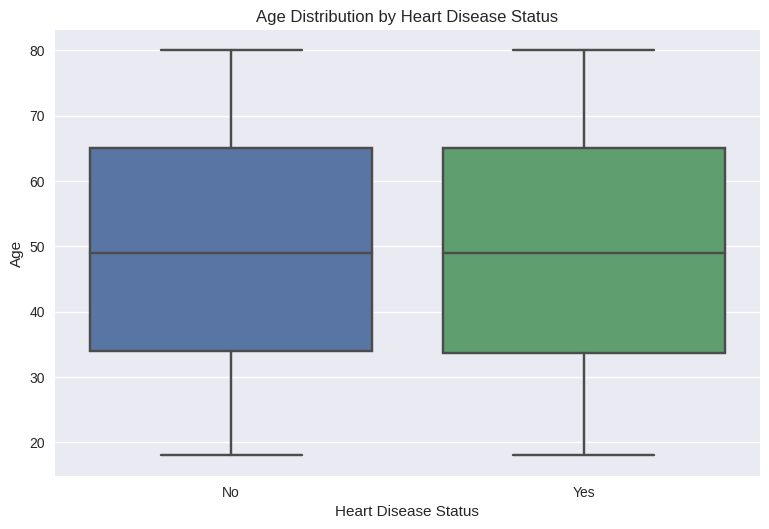

In [ ]:
# Age distribution by Heart Disease Status
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 2)
sns.boxplot(x='Heart Disease Status', y='Age', data=df)
plt.title('Age Distribution by Heart Disease Status')
plt.tight_layout()
plt.show()

# Key Takeaways:
* Similar Age Ranges: Both groups (with and without heart disease) have a similar age range, from around 20 to 80 years old.
* Median Age is the Same: The middle line in both boxes (the median) is nearly the same. This means that the average age of people with and without heart disease is very close.
* Variation in Ages: Some younger people also have heart disease, but age alone is not the biggest factor in determining whether someone will get it.

# What This Means:
* Age is a risk factor, but it's not enough on its own to predict heart disease. We need to look at other factors like blood pressure, cholesterol, lifestyle, and diet to get a clearer picture.

# BMI vs Blood Pressure Analysis

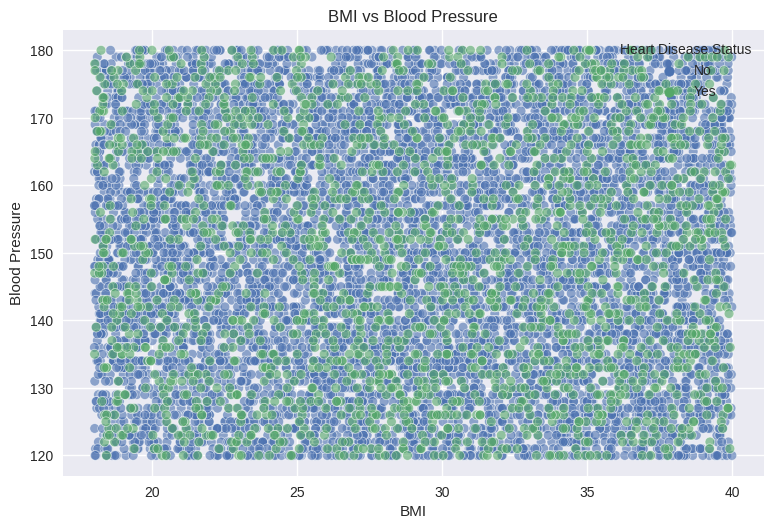

In [ ]:
# BMI vs Blood Pressure with Heart Disease Status
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x='BMI', y='Blood Pressure', hue='Heart Disease Status', alpha=0.6)
plt.title('BMI vs Blood Pressure')
plt.tight_layout()
plt.show()

# Key Takeaways (For Non-Technical Audience):
* No Clear Separation: People with and without heart disease (green and blue dots) are spread randomly across the chart.  This means that BMI and Blood Pressure alone don’t strongly predict heart disease.
* Higher Blood Pressure is Common: Most data points are between 120-180 mmHg, showing that blood pressure varies a lot.
* BMI Varies Across All Levels: People with heart disease exist across all BMI levels (from underweight to obese), meaning BMI alone is not a decisive factor.

# What This Means:
* This suggests that other factors (like cholesterol, exercise, or diet) play a bigger role in heart disease risk than just BMI and Blood Pressure.

# Heart Disease Distribution by Gender and Smoking Analysis

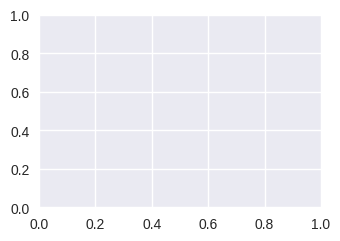

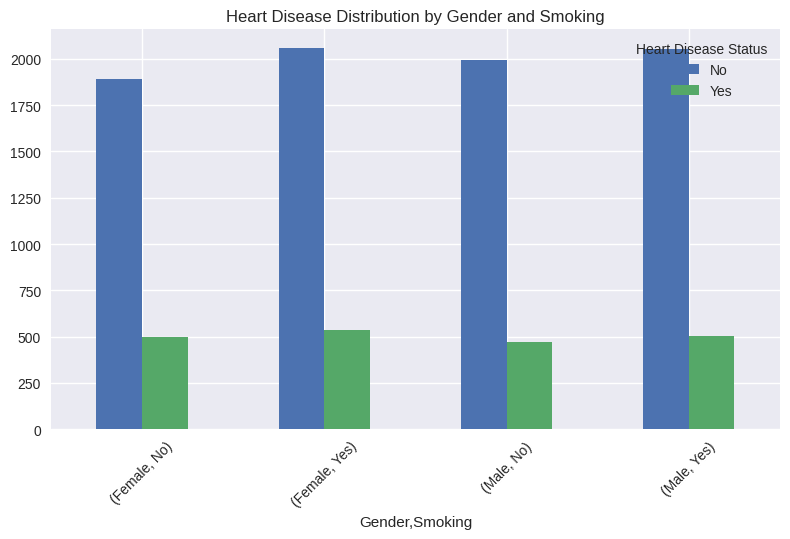

In [ ]:
# Heart Disease Distribution by Gender and Smoking
plt.subplot(2, 2, 4)
gender_smoking_disease = pd.crosstab([df['Gender'], df['Smoking']], df['Heart Disease Status'])
gender_smoking_disease.plot(kind='bar')
plt.title('Heart Disease Distribution by Gender and Smoking')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Key Insights from the Chart (Heart Disease, Gender & Smoking):
* Majority Do Not Have Heart Disease: Most individuals, regardless of gender or smoking status, do not have heart disease (blue bars are much taller).
* Smoking Has a Small Impact in This Data: The number of people with heart disease (green bars) is slightly higher in smokers compared to non-smokers, but the difference is not dramatic.
* Gender Does Not Show a Clear Difference: Both males and females have similar proportions of heart disease cases across smoking and non-smoking groups.
# Conclusion:
* Smoking might slightly increase heart disease risk, but gender alone does not seem to be a major factor in this dataset. Other risk factors should be analyzed further.

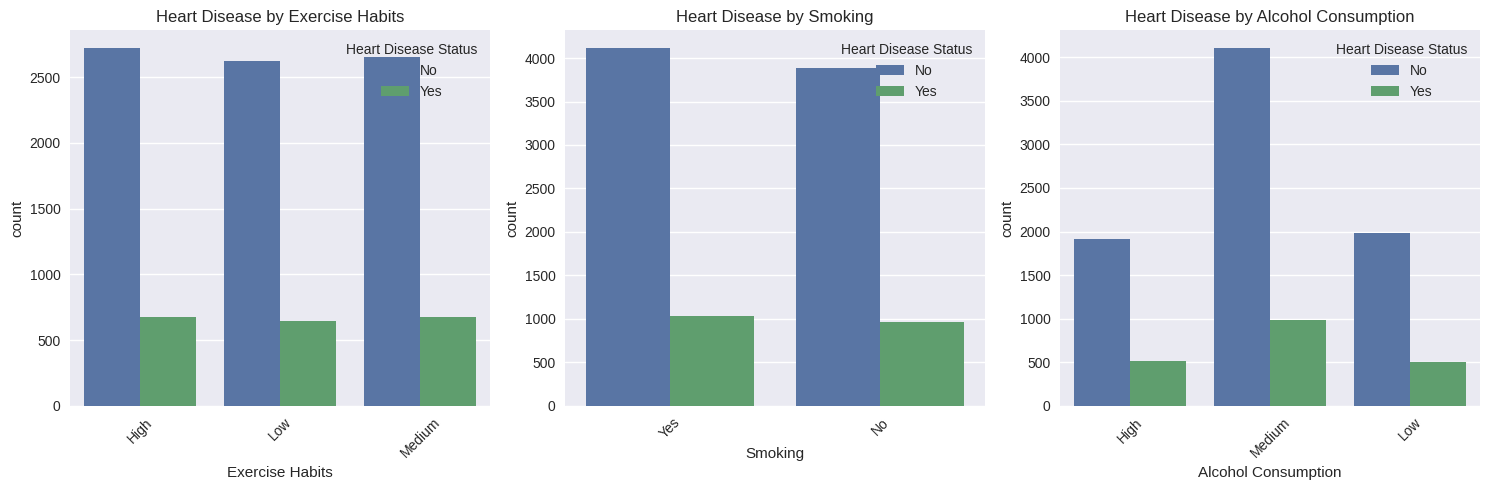

In [ ]:
# Analyze lifestyle factors (exercise, smoking, alcohol) and their relationship with heart disease
plt.figure(figsize=(15, 5))

# Exercise Habits vs Heart Disease
plt.subplot(1, 3, 1)
sns.countplot(data=df, x='Exercise Habits', hue='Heart Disease Status')
plt.title('Heart Disease by Exercise Habits')
plt.xticks(rotation=45)

# Smoking vs Heart Disease
plt.subplot(1, 3, 2)
sns.countplot(data=df, x='Smoking', hue='Heart Disease Status')
plt.title('Heart Disease by Smoking')
plt.xticks(rotation=45)

# Alcohol Consumption vs Heart Disease
plt.subplot(1, 3, 3)
sns.countplot(data=df, x='Alcohol Consumption', hue='Heart Disease Status')
plt.title('Heart Disease by Alcohol Consumption')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


# Key Insights from the Charts (Heart Disease & Lifestyle Factors):
1. Exercise Habits & Heart Disease
* People with high, medium, or low exercise levels have similar rates of heart disease.
* Regular exercise is important, but other factors might play a bigger role in heart disease risk.
2. Smoking & Heart Disease
* More smokers have heart disease compared to non-smokers.
* However, the difference is not dramatic, meaning smoking alone does not guarantee heart disease, but it is a risk factor.
3. Alcohol Consumption & Heart Disease
* People with medium alcohol consumption have the highest count of heart disease cases.
* Light and heavy drinkers show lower heart disease rates in this data, but this doesn’t mean alcohol is good—it depends on other health habits.
  
# Conclusion:
* Lifestyle matters, but no single habit (exercise, smoking, or drinking) fully determines heart disease risk.
A combination of factors, like diet, stress, and genetics, should also be considered when assessing heart health.

# Relationships Between Health Metrics and Heart Disease Status Analysis

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

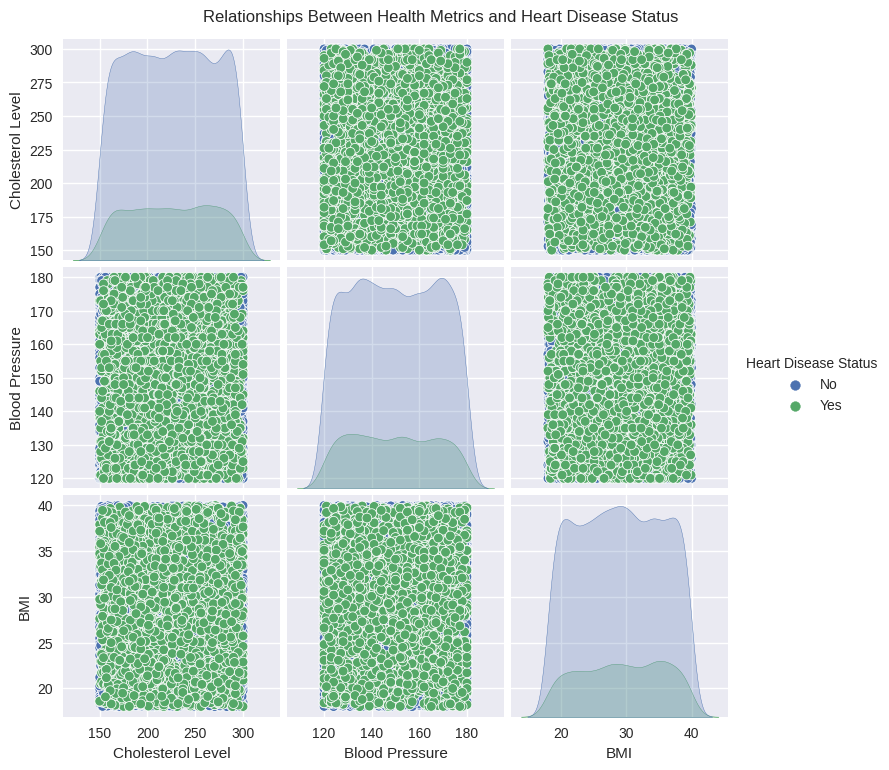

In [ ]:
# Visualize relationships between cholesterol, blood pressure, BMI, and heart disease status
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pairplot to explore relationships
sns.pairplot(df, vars=['Cholesterol Level', 'Blood Pressure', 'BMI'], hue='Heart Disease Status', diag_kind='kde')
plt.suptitle('Relationships Between Health Metrics and Heart Disease Status', y=1.02)
plt.show()

# Key Insights from the Health Metrics & Heart Disease Analysis:
1. Cholesterol, Blood Pressure, and BMI
* There is no clear separation between people with and without heart disease across cholesterol, blood pressure, and BMI levels.
* This suggests that heart disease is influenced by multiple factors rather than a single health metric.

2. Overlap in Distributions
* Both groups (with and without heart disease) have similar distributions in cholesterol, blood pressure, and BMI.
* This means that while high values may be risk factors, they are not definitive indicators of heart disease.

# What This Means for Decision-Making:
* Multiple health metrics should be analyzed together rather than relying on just cholesterol, blood pressure, or BMI alone.
* Other factors, like exercise, diet, genetics, and stress levels, should be considered for a comprehensive heart disease risk assessment.